## Homework \#2

### Dataset

In this homework, we will use the California Housing Prices. You can take it from
[Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### EDA

* Load the data.
* Look at the `median_house_value` variable. Does it have a long tail? 

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

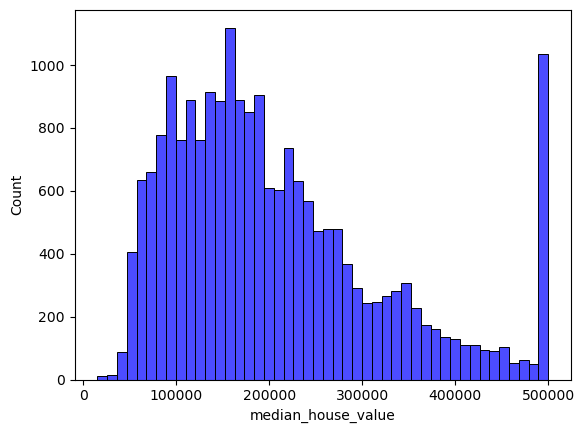

In [3]:
sns.histplot(data=df.median_house_value,alpha=0.7,color='blue')

### Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`

Select only them.

In [4]:
columns = ['latitude',
           'longitude',
           'housing_median_age',
           'total_rooms',
           'total_bedrooms',
           'population',
           'households',
           'median_income',
           'median_house_value']
df = df[columns]
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


### Question 1

Find a feature with missing values. How many missing values does it have?
- 207
- 307
- 408
- 508

In [5]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

The feature <code>total_bedrooms </code> is the unique feature with missing values. It has 207 missing values. 

### Question 2

What's the median (50% percentile) for variable 'population'?
- 1133
- 1122
- 1166
- 1188

In [6]:
print(f'The median (50% percentile) for variable \'population\' is {df.population.median()}')

The median (50% percentile) for variable 'population' is 1166.0


### Split the data

* Shuffle the initial dataset, use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('median_house_value') is not in your dataframe.
* Apply the log transformation to the median_house_value variable using the `np.log1p()` function.

In [7]:
np.random.seed(42) #Seed
n = df.shape[0]
n_val = int(0.2*n)
n_test = int(0.2*n)
n_train = n - (n_val+ n_test)
print(f'The sum of n_train, n_test and n_val is equal to the length of the dataframe? {(n_train + n_val + n_test) == df.shape[0]}')
index = np.arange(n)# Create an index with the length of df.
np.random.shuffle(index) #Shuffle index
#Select the df in the shuffled way
df_shuffle = df.iloc[index]
df_shuffle.head(10)

The sum of n_train, n_test and n_val is equal to the length of the dataframe? True


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0
13311,34.08,-117.61,12.0,4427.0,NaN,2400.0,843.0,4.7147,158700.0
7113,33.89,-118.02,36.0,1375.0,NaN,670.0,221.0,5.0839,198200.0
7668,33.92,-118.08,38.0,1335.0,NaN,1011.0,269.0,3.6908,157500.0
18246,37.39,-122.08,4.0,2292.0,NaN,1050.0,584.0,4.8036,340000.0
5723,34.18,-118.23,45.0,2332.0,NaN,943.0,339.0,8.1132,446600.0


In [8]:
#Create train/val/test datasets
df_train = df_shuffle.iloc[index[:n_train]]
df_val = df_shuffle.iloc[index[n_train:n_train+n_val]]
df_test = df_shuffle.iloc[index[n_train+n_val:]]

In [9]:
df_train.reset_index(drop=True,inplace=True)
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.97,-122.59,46.0,4036.0,856.0,1872.0,833.0,4.5625,275200.0
1,34.23,-119.19,17.0,3889.0,748.0,2415.0,739.0,4.5000,234300.0
2,33.95,-117.21,5.0,8403.0,1240.0,3962.0,1150.0,5.2174,155500.0
3,38.96,-122.63,20.0,2507.0,577.0,1072.0,457.0,2.3083,60200.0
4,34.15,-117.24,26.0,2041.0,293.0,936.0,375.0,6.0000,140200.0


In [10]:
df_val.reset_index(drop=True,inplace=True)
df_val.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,34.12,-117.84,25.0,3465.0,566.0,1722.0,536.0,4.8304,228900.0
1,34.04,-118.22,43.0,798.0,308.0,1417.0,325.0,1.4189,141700.0
2,34.16,-118.00,52.0,1354.0,227.0,531.0,206.0,4.8059,270600.0
3,40.78,-124.18,34.0,1592.0,364.0,950.0,317.0,2.1607,67000.0
4,33.94,-118.29,32.0,2701.0,708.0,1880.0,590.0,1.6716,123800.0


In [11]:
df_test.reset_index(drop=True,inplace=True)
df_test.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.81,-122.30,52.0,572.0,109.0,274.0,82.0,1.8516,85000.0
1,33.87,-118.36,22.0,2114.0,541.0,1300.0,538.0,3.4208,290000.0
2,39.79,-121.58,19.0,2636.0,523.0,1184.0,465.0,2.7863,108600.0
3,33.96,-117.43,28.0,3747.0,651.0,2399.0,646.0,3.8682,116500.0
4,37.28,-121.82,31.0,1340.0,235.0,1336.0,270.0,4.2361,179500.0


In [12]:
print(f'##### SHAPE OF DATASETS ########\n')
print(f'df_train:{df_train.shape} ')
print(f'df_val:{df_val.shape} ')
print(f'df_test:{df_test.shape} ')

##### SHAPE OF DATASETS ########

df_train:(12384, 9) 
df_val:(4128, 9) 
df_test:(4128, 9) 


In [13]:
#Select target variable for train/val/test datasets
y_train = np.log1p(df_train.median_house_value)
y_val = np.log1p(df_val.median_house_value)
y_test = np.log1p(df_test.median_house_value)

In [14]:
print(f'##### SHAPE OF TARGETS ########\n')
print(f'y_train:{y_train.shape} ')
print(f'y_val:{y_val.shape} ')
print(f'y_test:{y_test.shape} ')

##### SHAPE OF TARGETS ########

y_train:(12384,) 
y_val:(4128,) 
y_test:(4128,) 


In [15]:
#Drop the target variables from the train/val/test datasets.
df_train.drop(['median_house_value'],axis=1,inplace=True)
df_val.drop(['median_house_value'],axis=1,inplace=True)
df_test.drop(['median_house_value'],axis=1,inplace=True)

/tmp/ipykernel_28835/2475106561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['median_house_value'],axis=1,inplace=True)
/tmp/ipykernel_28835/2475106561.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val.drop(['median_house_value'],axis=1,inplace=True)
/tmp/ipykernel_28835/2475106561.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['median_house_value'],axis=1,inplace=True)


In [16]:
print(f'##### NEW SHAPE OF DATASETS after DROPPING TARGETS########\n')
print(f'df_train:{df_train.shape} ')
print(f'df_val:{df_val.shape} ')
print(f'df_test:{df_test.shape} ')

##### NEW SHAPE OF DATASETS after DROPPING TARGETS########

df_train:(12384, 8) 
df_val:(4128, 8) 
df_test:(4128, 8) 


### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:
- With 0
- With mean
- With median
- Both are equally good

In [17]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [18]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [19]:
def prepare_X(df,feature,filled):
    df = df.copy()
    df[feature].fillna(filled,inplace=True)
    X = df
    
    return X

In [20]:
for filled in [0,df_train['total_bedrooms'].mean(),df_train['total_bedrooms'].median()]:
    X_train = prepare_X(df_train,'total_bedrooms',filled)
    w0, w = train_linear_regression(X_train, y_train)
    X_val = prepare_X(df_val,'total_bedrooms',filled)
    y_pred = w0 + X_val.dot(w) #Predict target for validation dataset
    score = round(rmse(y_val, y_pred),2)
    print(score)

0.34
0.34
0.34


Accordingly to the results shown above all three options (zero, mean and median) gives the same result.

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:
- 0
- 0.000001
- 0.001
- 0.0001

In [21]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [33]:
X_train = prepare_X(df_train,'total_bedrooms',0)
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    X_val = prepare_X(df_val,'total_bedrooms',0)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, round(score,5))

0 -11.785190189896099 0.34027
1e-06 -11.785174393137918 0.34027
0.0001 -11.783610756825771 0.34027
0.001 -11.769414883467705 0.34027
0.01 -11.629314514360468 0.34028
0.1 -10.392209412047103 0.34043
1 -5.0346631320161634 0.34409
5 -1.5279677347686327 0.34903
10 -0.8156765041332776 0.35028


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

Options:
- 0.16
- 0.00005
- 0.005
- 0.15555

In [31]:
final_score =[]
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed) #Seed
    n = df.shape[0]
    n_val = int(0.2*n)
    n_test = int(0.2*n)
    n_train = n - (n_val+ n_test)
    index = np.arange(n)# Create an index with the length of df.
    np.random.shuffle(index) #Shuffle index
    df_shuffle = df.iloc[index] #Select the df in the shuffled way
    #df_shuffle.head(10)
    #Create train/val/test datasets
    df_train = df_shuffle.iloc[index[:n_train]]
    df_train.reset_index(drop=True,inplace=True)
    df_val = df_shuffle.iloc[index[n_train:n_train+n_val]]
    df_val.reset_index(drop=True,inplace=True)
    df_test = df_shuffle.iloc[index[n_train+n_val:]]
    df_test.reset_index(drop=True,inplace=True)
    #Select target variable for train/val/test datasets
    y_train = np.log1p(df_train.median_house_value)
    y_val = np.log1p(df_val.median_house_value)
    y_test = np.log1p(df_test.median_house_value)
    #Drop the target variables from the train/val/test datasets.
    df_train.drop(['median_house_value'],axis=1,inplace=True)
    df_val.drop(['median_house_value'],axis=1,inplace=True)
    df_test.drop(['median_house_value'],axis=1,inplace=True)
    X_train = prepare_X(df_train,'total_bedrooms',filled)
    w0, w = train_linear_regression(X_train, y_train)
    X_val = prepare_X(df_val,'total_bedrooms',filled)
    y_pred = w0 + X_val.dot(w) #Predict target for validation dataset
    score = rmse(y_val, y_pred)
    final_score.append(score)
    print(f'Seed: {seed} --> score: {score}')

Seed: 0 --> score: 0.3474811223679101
Seed: 1 --> score: 0.3424510121414567
Seed: 2 --> score: 0.3392865610367539
Seed: 3 --> score: 0.33470639424513904
Seed: 4 --> score: 0.33786929756654527
Seed: 5 --> score: 0.34539331556523617
Seed: 6 --> score: 0.3390630038692265
Seed: 7 --> score: 0.33786489105965384
Seed: 8 --> score: 0.3478597573243022
Seed: 9 --> score: 0.3401916455850492


/tmp/ipykernel_28835/3485686187.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['median_house_value'],axis=1,inplace=True)
/tmp/ipykernel_28835/3485686187.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val.drop(['median_house_value'],axis=1,inplace=True)
/tmp/ipykernel_28835/3485686187.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['median_house_value'],axis=1,inplace=True)
/tmp/ipykerne

In [32]:
print(round(np.std(final_score),3))

0.004


### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:
- 0.35
- 0.135
- 0.450
- 0.245

In [37]:
df_full_train = pd.concat([df_train,df_val])
df_full_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,34.00,-117.88,32.0,265.0,51.0,170.0,50.0,3.9375
1,33.81,-117.95,33.0,1724.0,291.0,943.0,285.0,5.1180
2,37.81,-122.30,48.0,1455.0,354.0,788.0,332.0,0.8056
3,33.89,-117.80,25.0,3121.0,381.0,1278.0,389.0,7.0217
4,34.51,-117.28,10.0,4676.0,884.0,2845.0,812.0,3.0181


In [38]:
X_full_train = prepare_X(df_full_train,'total_bedrooms',0)

In [39]:
X_full_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,34.00,-117.88,32.0,265.0,51.0,170.0,50.0,3.9375
1,33.81,-117.95,33.0,1724.0,291.0,943.0,285.0,5.1180
2,37.81,-122.30,48.0,1455.0,354.0,788.0,332.0,0.8056
3,33.89,-117.80,25.0,3121.0,381.0,1278.0,389.0,7.0217
4,34.51,-117.28,10.0,4676.0,884.0,2845.0,812.0,3.0181
...,...,...,...,...,...,...,...,...
4123,36.64,-121.79,11.0,32627.0,6445.0,28566.0,6082.0,2.3087
4124,34.15,-118.61,32.0,4491.0,815.0,1696.0,749.0,4.9102
4125,35.48,-120.65,19.0,2310.0,471.0,1341.0,441.0,3.2250
4126,33.97,-118.31,52.0,1629.0,277.0,819.0,288.0,3.7250


In [40]:
y_full_train = np.concatenate([y_train,y_val])

In [41]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r = 0.001)

In [44]:
X_test = prepare_X(df_test,'total_bedrooms',0)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
print(f'RMSE: {round(score,2)}')

RMSE: 0.35


## Submit the results
- Submit your results here: https://forms.gle/WCVb4KMNsgbkuJtr6
- If your answer doesn't match options exactly, select the closest one.
- You can submit your solution multiple times. In this case, only the last submission will be used

## Deadline

The deadline for submitting is, 19 September 2022, 23:00 CET. After that, the form will be closed.